Final Project

Student Name: Bobbin Okeyo Bodo

Student pace: Hybrid 

Schedule project review date/time: 21/12/2025

Instructor name: Maryann Mwikali


Projet Overview: 

I am cleaning, imputating, analyzing and vizualizing data to generate insights for a business stakeholder.

Data:

The dataset National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

Business Objectives:

Get to understand the data so as to help my company expand into new industries to diversify its portfolio. Our company is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [32]:
AviationData = pd.read_csv('Aviation_Data.csv')
AviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [33]:
# Test to ensure the data is loaded correctly

assert type(AviationData) == pd.DataFrame

Getting information of data set

In [34]:
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Getting a descriptive statistics of our numerical dataframe coluumns

In [35]:
AviationData.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


CLEANING DATA

In [36]:
# Droping duplicate rows if any found under specific columns, namely 'Event.Id', 'Investigation.Type', and 'Accident.Number'

AviationData.drop_duplicates(subset=['Event.Id', 'Investigation.Type', 'Accident.Number'], inplace=True)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88932 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88863 non-null  object 
 1   Investigation.Type      88932 non-null  object 
 2   Accident.Number         88863 non-null  object 
 3   Event.Date              88863 non-null  object 
 4   Location                88811 non-null  object 
 5   Country                 88637 non-null  object 
 6   Latitude                34363 non-null  object 
 7   Longitude               34354 non-null  object 
 8   Airport.Code            50233 non-null  object 
 9   Airport.Name            52774 non-null  object 
 10  Injury.Severity         87873 non-null  object 
 11  Aircraft.damage         85678 non-null  object 
 12  Aircraft.Category       32263 non-null  object 
 13  Registration.Number     87546 non-null  object 
 14  Make                    88800 non-null

In [37]:
# Dropping columns that are not necessary for analysis

AviationData = AviationData.drop(['Investigation.Type', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Publication.Date', 'Schedule', 'Registration.Number', 'Air.carrier', 'FAR.Description', 'Purpose.of.flight', 'Broad.phase.of.flight'] , axis=1)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88932 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88863 non-null  object 
 1   Accident.Number         88863 non-null  object 
 2   Event.Date              88863 non-null  object 
 3   Location                88811 non-null  object 
 4   Country                 88637 non-null  object 
 5   Injury.Severity         87873 non-null  object 
 6   Aircraft.damage         85678 non-null  object 
 7   Aircraft.Category       32263 non-null  object 
 8   Make                    88800 non-null  object 
 9   Model                   88771 non-null  object 
 10  Amateur.Built           88761 non-null  object 
 11  Number.of.Engines       82789 non-null  float64
 12  Engine.Type             81806 non-null  object 
 13  Total.Fatal.Injuries    77462 non-null  float64
 14  Total.Serious.Injuries  76353 non-null

In [38]:
# Dropping rows with missing values in critical columns

AviationData = AviationData.dropna(subset=['Make', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74283 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                74283 non-null  object 
 1   Accident.Number         74283 non-null  object 
 2   Event.Date              74283 non-null  object 
 3   Location                74251 non-null  object 
 4   Country                 74071 non-null  object 
 5   Injury.Severity         73310 non-null  object 
 6   Aircraft.damage         71640 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    74283 non-null  object 
 9   Model                   74244 non-null  object 
 10  Amateur.Built           74282 non-null  object 
 11  Number.of.Engines       69609 non-null  float64
 12  Engine.Type             68703 non-null  object 
 13  Total.Fatal.Injuries    74283 non-null  float64
 14  Total.Serious.Injuries  74283 non-null

In [39]:
# Converting data types of certain columns for better analysis

AviationData['Total.Fatal.Injuries'] = AviationData['Total.Fatal.Injuries'].astype(int)
AviationData['Total.Serious.Injuries'] = AviationData['Total.Serious.Injuries'].astype(int)
AviationData['Total.Minor.Injuries'] = AviationData['Total.Minor.Injuries'].astype(int)
AviationData['Total.Uninjured'] = AviationData['Total.Uninjured'].astype(int)
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74283 entries, 0 to 90347
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                74283 non-null  object 
 1   Accident.Number         74283 non-null  object 
 2   Event.Date              74283 non-null  object 
 3   Location                74251 non-null  object 
 4   Country                 74071 non-null  object 
 5   Injury.Severity         73310 non-null  object 
 6   Aircraft.damage         71640 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    74283 non-null  object 
 9   Model                   74244 non-null  object 
 10  Amateur.Built           74282 non-null  object 
 11  Number.of.Engines       69609 non-null  float64
 12  Engine.Type             68703 non-null  object 
 13  Total.Fatal.Injuries    74283 non-null  int32  
 14  Total.Serious.Injuries  74283 non-null

Drop missing values under Aircraft category

In [40]:
AviationData = AviationData.dropna(subset=['Aircraft.Category'])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28184 entries, 7 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                28184 non-null  object 
 1   Accident.Number         28184 non-null  object 
 2   Event.Date              28184 non-null  object 
 3   Location                28184 non-null  object 
 4   Country                 28174 non-null  object 
 5   Injury.Severity         27308 non-null  object 
 6   Aircraft.damage         26845 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    28184 non-null  object 
 9   Model                   28161 non-null  object 
 10  Amateur.Built           28183 non-null  object 
 11  Number.of.Engines       25067 non-null  float64
 12  Engine.Type             22980 non-null  object 
 13  Total.Fatal.Injuries    28184 non-null  int32  
 14  Total.Serious.Injuries  28184 non-null

Filling mising values of categories

In [41]:
# Filling missing values of numerical columns with the mean

Total_Fatal_Injuries_mean = AviationData['Total.Fatal.Injuries'].fillna(0).mean()
AviationData['Total.Fatal.Injuries'] = AviationData['Total.Fatal.Injuries'].fillna(Total_Fatal_Injuries_mean)
Total_Serious_Injuries_mean = AviationData['Total.Serious.Injuries'].fillna(0).mean()
AviationData['Total.Serious.Injuries'] = AviationData['Total.Serious.Injuries'].fillna(Total_Serious_Injuries_mean)
Total_Minor_Injuries_mean = AviationData['Total.Minor.Injuries'].fillna(0).mean()
AviationData['Total.Minor.Injuries'] = AviationData['Total.Minor.Injuries'].fillna(0)
Total_Uninjured_mean = AviationData['Total.Uninjured'].fillna(0).mean()
AviationData['Total.Uninjured'] = AviationData['Total.Uninjured'].fillna(Total_Uninjured_mean)

#Filling categorial columns with the mode
Location_mode = AviationData['Location'].fillna(0).mode()
AviationData['Location'] = AviationData['Location'].fillna(Location_mode[0])
Injury_Severity_mode = AviationData['Injury.Severity'].fillna(0).mode()
AviationData['Injury.Severity'] = AviationData['Injury.Severity'].fillna(Injury_Severity_mode[0])
Aircraft_Damage_mode = AviationData['Aircraft.damage'].fillna(0).mode()
AviationData['Aircraft.damage'] = AviationData['Aircraft.damage'].fillna(Aircraft_Damage_mode[0])
Make_mode = AviationData['Make'].fillna(0).mode()
AviationData['Make'] = AviationData['Make'].fillna(Make_mode[0])
Model_mode = AviationData['Model'].fillna(0).mode()
AviationData['Model'] = AviationData['Model'].fillna(Model_mode[0])
Amateur_Built_mode = AviationData['Amateur.Built'].fillna(0).mode()
AviationData['Amateur.Built'] = AviationData['Amateur.Built'].fillna(Amateur_Built_mode[0])
Number_of_Engines_mode = AviationData['Number.of.Engines'].fillna(0).mode()
AviationData['Number.of.Engines'] = AviationData['Number.of.Engines'].fillna(Number_of_Engines_mode[0])
Engine_Type_mode = AviationData['Engine.Type'].fillna(0).mode()
AviationData['Engine.Type'] = AviationData['Engine.Type'].fillna(Engine_Type_mode[0])
Weather_Condition_mode = AviationData['Weather.Condition'].fillna(0).mode()
AviationData['Weather.Condition'] = AviationData['Weather.Condition'].fillna(Weather_Condition_mode[0])
Report_Status_mode = AviationData['Report.Status'].fillna(0).mode()
AviationData['Report.Status'] = AviationData['Report.Status'].fillna(Report_Status_mode[0])
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28184 entries, 7 to 90345
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                28184 non-null  object 
 1   Accident.Number         28184 non-null  object 
 2   Event.Date              28184 non-null  object 
 3   Location                28184 non-null  object 
 4   Country                 28174 non-null  object 
 5   Injury.Severity         28184 non-null  object 
 6   Aircraft.damage         28184 non-null  object 
 7   Aircraft.Category       28184 non-null  object 
 8   Make                    28184 non-null  object 
 9   Model                   28184 non-null  object 
 10  Amateur.Built           28184 non-null  object 
 11  Number.of.Engines       28184 non-null  float64
 12  Engine.Type             28184 non-null  object 
 13  Total.Fatal.Injuries    28184 non-null  int32  
 14  Total.Serious.Injuries  28184 non-null

Statistical description of my data after cleaning

In [42]:
AviationData.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,28184.000000,28184.000000,28184.000000,28184.000000,28184.000000
mean,1.119997,0.553683,0.292258,0.208806,5.316882
std,0.400571,4.853087,1.962803,0.868295,28.038031
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000


In [43]:
AviationData = AviationData.sort_values(by='Total.Fatal.Injuries', ascending=False) # sort fatalities from highest
AviationData = AviationData.reset_index(drop=True) # Reset index, dropping the old index
AviationData.head(5)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20140718X92314,DCA14RA127,2014-07-17,"Hrabove, Ukraine",Ukraine,Fatal,Destroyed,Airplane,BOEING,777 - 206,No,1.0,Reciprocating,295,0,0,0,VMC,0
1,20140308X91420,DCA14RA076,2014-03-08,"Kuala Lampur, Malaysia",Malaysia,Fatal,Destroyed,Airplane,BOEING,777 - 206,No,1.0,Reciprocating,239,0,0,0,VMC,0
2,20090601X72555,DCA09RA052,2009-06-01,"Atlantic, France",France,Fatal,Destroyed,Airplane,AIRBUS,A330,No,2.0,Reciprocating,228,0,0,0,VMC,.
3,20151102X00423,DCA16WA015,2015-10-31,"Sinai Peninsula, Egypt",Egypt,Fatal,Destroyed,Airplane,AIRBUS,A321,No,1.0,Reciprocating,224,0,0,0,VMC,0
4,20181029X04746,DCA19RA017,2018-10-29,"Jakarta, Indonesia",Indonesia,Fatal,Destroyed,Airplane,BOEING,737,No,1.0,Reciprocating,188,0,0,0,VMC,0


In [44]:
# Bottom 5 records with least fatal injuries

AviationData.tail(5)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
28179,20110903X53441,WPR11FA426,2011-09-03,"Heber City, UT",United States,Non-Fatal,Substantial,Helicopter,ENSTROM,280FX,No,1.0,Reciprocating,0,0,3,0,VMC,The pilots failure to ensure that there was s...
28180,20110903X50008,WPR11CA425,2011-09-03,"Gerlach, NV",United States,Non-Fatal,Substantial,Airplane,PIPER,PA-28-180,No,1.0,Reciprocating,0,1,0,1,VMC,The pilots decision to land at an unknown off...
28181,20110906X05214,CEN11LA618,2011-09-02,"Marion, IL",United States,Non-Fatal,Substantial,Airplane,Vicari,Waiex,Yes,1.0,Reciprocating,0,0,0,1,VMC,The partial loss of engine power during initia...
28182,20110903X41910,WPR11FA424,2011-09-02,"Lakeport, CA",United States,Non-Fatal,Substantial,Airplane,CONSOLIDATED AERONAUTICS INC.,LAKE LA-4-200,No,1.0,Reciprocating,0,0,1,0,VMC,The pilot's decision to continue the takeoff w...
28183,20221227106497,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Reciprocating,0,0,0,1,VMC,0


Creating an analysis filtering columns and grouping columns

In [45]:

# Grouping data by Make (aircraft manufacturer) and aggregating several metrics for each make

metrics = AviationData.groupby('Make').agg( # Created a new variable (metrics)
    total_incidents=('Make', 'size'),
    total_aircraft_category=('Aircraft.Category', 'sum'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),
    total_serious_injuries=('Total.Serious.Injuries', 'sum'),

    total_minor_injuries=('Total.Minor.Injuries', 'sum'),
    total_uninjured=('Total.Uninjured', 'sum')
).reset_index() # Reset index, dropping the old inde
metrics.head()

# Grouping data aircraft model and aggregating several metrics for each make 
metrics = AviationData.groupby('Model').agg(
    total_incidents=('Model', 'size'),
    total_aircraft_category=('Aircraft.Category', 'sum'),
    total_fatal_injuries=('Total.Fatal.Injuries', 'sum'),
    total_serious_injuries=('Total.Serious.Injuries', 'sum'),

    total_minor_injuries=('Total.Minor.Injuries', 'sum'),
    total_uninjured=('Total.Uninjured', 'sum')
).reset_index() # Reset index, dropping the old inde
metrics.head()
metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics = metrics.reset_index(drop=True) # Reset index, dropping the old index
metrics.head(10)
metrics = metrics.sort_values(by='total_fatal_injuries', ascending=True)
metrics = metrics.reset_index(drop=True)
metrics.head(10)
metrics.tail(10)

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
5958,A310,1,Airplane,152,0,1,0
5959,MD-82,4,AirplaneAirplaneAirplaneAirplane,154,0,18,137
5960,A320 - 216,1,Airplane,162,0,0,0
5961,A320,80,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,170,11,13,3358
5962,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222
5963,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923
5964,A330,30,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,331,19,24,2770
5965,A321,20,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,381,0,2,1349
5966,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0
5967,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390


In [46]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Model                    5968 non-null   object
 1   total_incidents          5968 non-null   int64 
 2   total_aircraft_category  5968 non-null   object
 3   total_fatal_injuries     5968 non-null   int32 
 4   total_serious_injuries   5968 non-null   int32 
 5   total_minor_injuries     5968 non-null   int32 
 6   total_uninjured          5968 non-null   int32 
dtypes: int32(4), int64(1), object(2)
memory usage: 233.2+ KB


In [47]:
metrics.describe() # Calculating the central tendencies of the cleaned data 

,total_incidents,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,4.722520,2.614779,1.380194,0.986092,25.109082
std,19.323173,21.964806,7.379878,3.993959,313.749888
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,1.000000,1.000000,4.000000
max,840.000000,1341.000000,339.000000,129.000000,20390.000000


Analysis

In [48]:

metrics = metrics.sort_values(by='total_incidents', ascending=False) # sort from highest to lowest
metrics = metrics.reset_index(drop=True)  # Reset index, dropping the old index
metrics.head(10) # Checking models with highest number of incidents

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
0,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923
1,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390
2,152,370,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,59,45,30,374
3,182,316,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,147,88,58,332
4,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222
5,PA28,273,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,116,66,48,262
6,SR22,250,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,145,67,40,246
7,172N,240,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,95,60,34,274
8,150,237,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,65,31,54,194
9,180,205,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,22,35,21,302


In [49]:


metrics = metrics.sort_values(by='total_incidents', ascending=False)
metrics = metrics.reset_index(drop=True)
metrics.tail(10) # Checking models with least number of incidents

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
5958,APT70,1,Helicopter,0,0,0,0
5959,ASW 20B,1,Glider,0,0,1,0
5960,ASW 24,1,Glider,0,0,1,0
5961,AVID C AEROBAT,1,Airplane,0,0,1,0
5962,AVID AMPHIBIAN,1,Airplane,0,2,0,0
5963,APOLLO AG-1,1,Gyrocraft,0,1,0,0
5964,AR-58,1,Airplane,0,1,1,0
5965,AS-350 BA,1,Helicopter,0,0,0,2
5966,AS-105-GD,1,Blimp,0,0,1,0
5967,SUPER CHIEF,1,Airplane,0,0,0,1


In [50]:

metrics['fatality_rate'] = metrics['total_fatal_injuries'] / metrics['total_incidents']  # Dividing total fatal injuries by total incidents to get fatality rate
metrics = metrics.sort_values(by='fatality_rate', ascending=False)
metrics.head(10) # Checking highest fatality rate by models

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
1500,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0,178.0
4914,A320 - 216,1,Airplane,162,0,0,0,162.0
4643,A310,1,Airplane,152,0,1,0,152.0
4686,TU154,1,Airplane,89,0,0,0,89.0
4774,AN148,1,Airplane,71,0,0,0,71.0
1430,A320-211,3,AirplaneAirplaneAirplane,150,0,0,140,50.0
4369,737 - 500,1,Airplane,50,0,0,0,50.0
4414,SJ100,1,Airplane,44,0,0,0,44.0
2192,737-500,2,AirplaneAirplane,88,0,0,39,44.0
5534,72,1,Airplane,43,1,14,0,43.0


In [51]:

metrics['fatality_rate'] = metrics['total_fatal_injuries'] / metrics['total_incidents']  # Dividing total fatal injuries by total incidents to get fatality rate
metrics = metrics.sort_values(by='fatality_rate')
metrics.tail(10) # Check model with lowest fatality rate


,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
5534,72,1,Airplane,43,1,14,0,43.0
2192,737-500,2,AirplaneAirplane,88,0,0,39,44.0
4414,SJ100,1,Airplane,44,0,0,0,44.0
4369,737 - 500,1,Airplane,50,0,0,0,50.0
1430,A320-211,3,AirplaneAirplaneAirplane,150,0,0,140,50.0
4774,AN148,1,Airplane,71,0,0,0,71.0
4686,TU154,1,Airplane,89,0,0,0,89.0
4643,A310,1,Airplane,152,0,1,0,152.0
4914,A320 - 216,1,Airplane,162,0,0,0,162.0
1500,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0,178.0


In [52]:

metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics.head(10) # Check models with highest fatalities

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
1,737,400,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,1341,339,83,20390,3.352500
1500,777 - 206,3,AirplaneAirplaneAirplane,534,0,0,0,178.000000
245,A321,20,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,381,0,2,1349,19.050000
147,A330,30,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,331,19,24,2770,11.033333
0,172,840,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,239,187,129,923,0.284524
4,R44,289,HelicopterHelicopterHelicopterHelicopterHelico...,211,92,78,222,0.730104
39,A320,80,AirplaneAirplaneAirplaneAirplaneAirplaneAirpla...,170,11,13,3358,2.125000
4914,A320 - 216,1,Airplane,162,0,0,0,162.000000
1015,MD-82,4,AirplaneAirplaneAirplaneAirplane,154,0,18,137,38.500000
4643,A310,1,Airplane,152,0,1,0,152.000000


In [53]:

metrics = metrics.sort_values(by='total_fatal_injuries', ascending=False)
metrics.tail(5) # Check models with lowest fatalities

,Model,total_incidents,total_aircraft_category,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,fatality_rate
5152,CRAIGCRAFT,1,Airplane,0,0,0,1,0.0
5157,CESSNA 441,1,Airplane,0,0,0,0,0.0
5158,DEUCE,1,Airplane,0,0,1,0,0.0
5225,CTSW HXB,1,Airplane,0,2,0,0,0.0
5875,T-18 TIGER,1,Airplane,0,1,0,1,0.0


Visualization

 Top 10 Aircrafts models by total incidents 

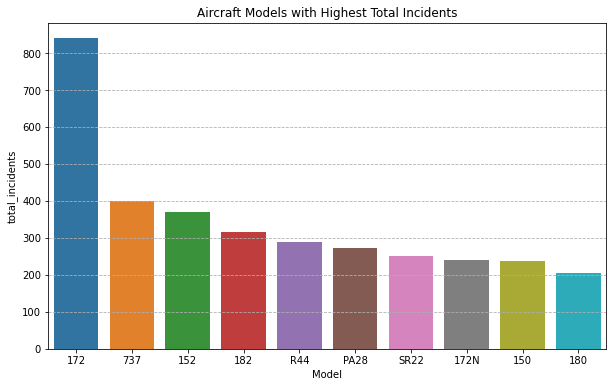

In [54]:

top_10_incidents = metrics.sort_values(by='total_incidents', ascending=False).head(10) # Created a new variable top_10_incidents
plt.figure(figsize=(10, 6)) # length and width of bar graph
sns.barplot(x='Model', y='total_incidents', data=top_10_incidents) # plotting top 10 incidents
plt.xlabel('Model') # labeling the x axis as Model
plt.ylabel('total_incidents') # labeling the y axis as Total incidents
plt.title('Aircraft Models with Highest Total Incidents') # Naming the bar graph
plt.grid(axis='y', linestyle='--') # creating grid line for y axis
plt.show()

Top 10 Aircrafts models by total fatalities

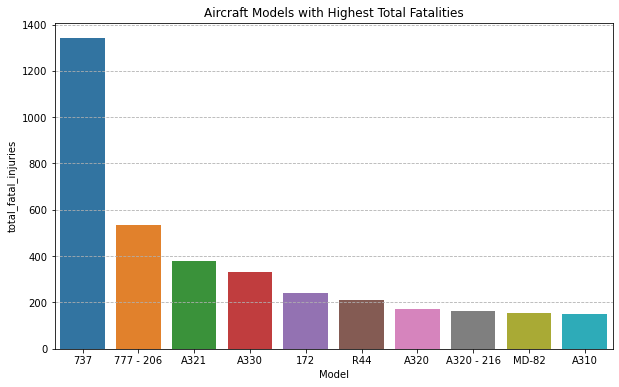

In [55]:

top_10_fatal = metrics.sort_values(by='total_fatal_injuries', ascending=False).head(10) # Created a new variable top_10_fatal
plt.figure(figsize=(10, 6)) # length and width of bar graph
sns.barplot(x='Model', y='total_fatal_injuries', data=top_10_fatal) # plotting top 10 fatal injuries
plt.xlabel('Model') # labeling the x axis as Model
plt.ylabel('total_fatal_injuries') # labeling the y axis as total fatal injuries 
plt.title('Aircraft Models with Highest Total Fatalities') # labeling the bar graph as Aircraft Models with Highest Total Fatalities
plt.grid(axis='y', linestyle='--') # creating a grid for y axis
plt.show() 

Models with least number of incidents

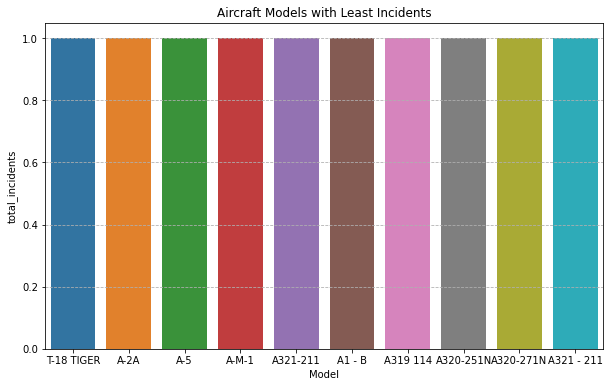

In [56]:

least_10_incidents = metrics.sort_values(by='total_incidents', ascending=True).head(10) # Created a new variable least_10_incidents
plt.figure(figsize=(10, 6))# length and width of bar graph
sns.barplot(x='Model', y='total_incidents', data=least_10_incidents)# plotting least 10 total incidents
plt.xlabel('Model')# labeling the x axis as Model
plt.ylabel('total_incidents') #labeling the y axis as total incidents
plt.title('Aircraft Models with Least Incidents')# labeling the bar graph as Aircraft Models with Highest Least incidents
plt.grid(axis='y', linestyle='--')# creating a grid for y axis
plt.show()


Here we identify Aircraft Models that registered the highest number of unijured passengers 

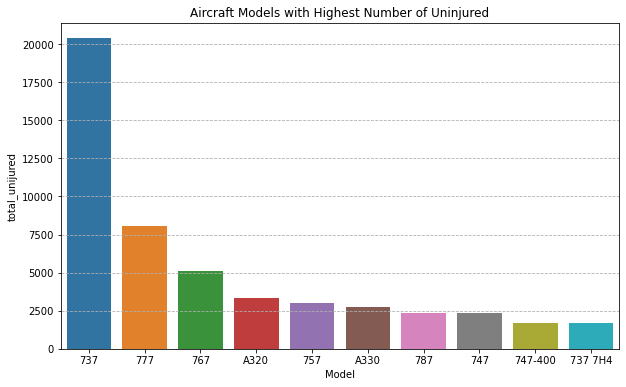

In [57]:

top_10_unijured = metrics.sort_values(by='total_uninjured', ascending=False).head(10) # Created a new variable top_10_uninjured
plt.figure(figsize=(10, 6))# length and width of bar graph
sns.barplot(x='Model', y='total_uninjured', data=top_10_unijured)# plotting top 10 model with hhighest unijured 
plt.xlabel('Model')# labeling the x axis as Model
plt.ylabel('total_unijured')# labeling the y axis as total uninjured
plt.title('Aircraft Models with Highest Number of Uninjured')# labeling the bar graph as Aircraft Models with Highest Uninjured
plt.grid(axis='y', linestyle='--')# creating a grid for y axis
plt.show()



Aircraft Models with highest number of uninjured

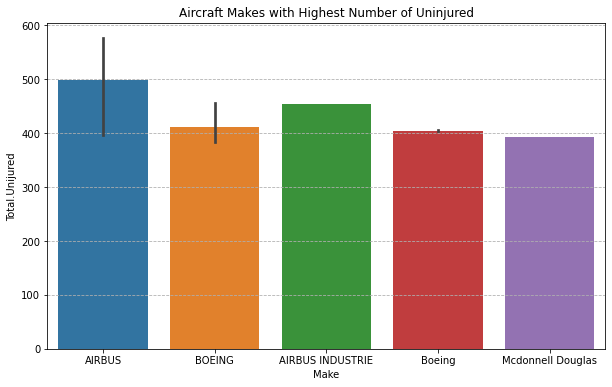

In [58]:
top_5= AviationData.sort_values(by='Total.Uninjured', ascending=False).head(10) # Created a new variable top_5 to get the 5 top aircraft makes with highest number of uininjured
plt.figure(figsize=(10, 6))
sns.barplot(x='Make', y='Total.Uninjured', data=top_5)
plt.xlabel('Make')# labeling the x axis as Make
plt.ylabel('Total.Unijured') # labeling the y axis as total fatal injuries 
plt.title('Aircraft Makes with Highest Number of Uninjured')# labeling the bar graph as Aircraft Makes with Highest Uninjured
plt.grid(axis='y', linestyle='--')# creating a grid for y axis
plt.show()

In [62]:
AviationData.to_csv('New_Cleaned_Data.csv')

Findings

- From my findings, aircraft makes Boeing, Airbus and Mcdonnels Douglas were the most frequently used for commercial purposes, whereas Cessna, Cyrus, Piper and Helicopter R44 were mostly used for personal enterprise.

- Makes, Boeing 777-206, Airbus A320-216, Airbus A310, Tupolev TU154, Antonov AN148 recorded the highest fatality rates.

- Whereas, Boeing 737, Boeing 777-206 Airbus A321, Airbus A330, Cessns 172 recorded the highest fatalities per incident.

- Overally, Cessna recorded the highest number of accident incidents, followed by a distant Boieng. Commercial planes recorded the least number of accident incidents as compared to private planes and helicopters.

- Airbus is the safest aircraft having recorded the least accidents incidents amongst commercial airplanes, Icon A-5, Mooney cadet A-2A and Thorp T-18-Tiger were the safest amongst private planes.

Recommendations

- Based on findings from the data, I recommend the company invest in the following airplanes for commercial use;

1. Airbus A321-211
2. Airbus A320-251
3. Airbus A320-277
4. Boeing 737

and the following for private enterprise;

1. Icon A-5
2. Mooney cadet A-2A
3. Thorp T-18-Tiger


Link to my interactive dashboard in Tableau

https://public.tableau.com/views/Phase1projectInteractiveDashboard/Phase1projectInteractivedashboard?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link








Thank you!